In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats



In [6]:
df=pd.read_csv("D:/house-prices-advanced-regression-techniques/house-prices-advanced-regression-techniques/train.csv")

In [7]:
pd.set_option("display.max_columns", None)
pd.reset_option("display.max_rows")

In [8]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [9]:
# droping id column as it is not needed for modeling 
new_df=df.drop("Id",axis=1)

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [11]:
new_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0, 0.5, 'Frequency')

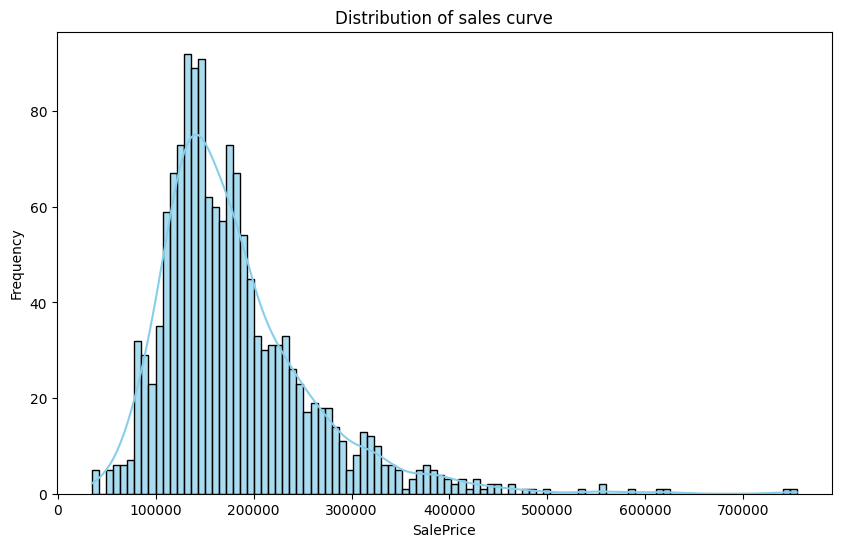

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(new_df["SalePrice"],kde=True,bins=100,color="skyblue",edgecolor='black' ,linewidth=1,alpha=.7)
plt.title("Distribution of sales curve")
plt.ylabel("Frequency")

In [13]:
print(f'skewness: {new_df["SalePrice"].skew()}')
print(f'kurtosis: {new_df["SalePrice"].kurt()}')

skewness: 1.8828757597682129
kurtosis: 6.536281860064529


In [14]:
list(set(new_df.dtypes))

[dtype('float64'), dtype('O'), dtype('int64')]

In [15]:
num_df=new_df.select_dtypes(include=['int64','float64'])

In [16]:
num_df.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,143000
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000
7,60,NaN,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,200000
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,129900
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,118000


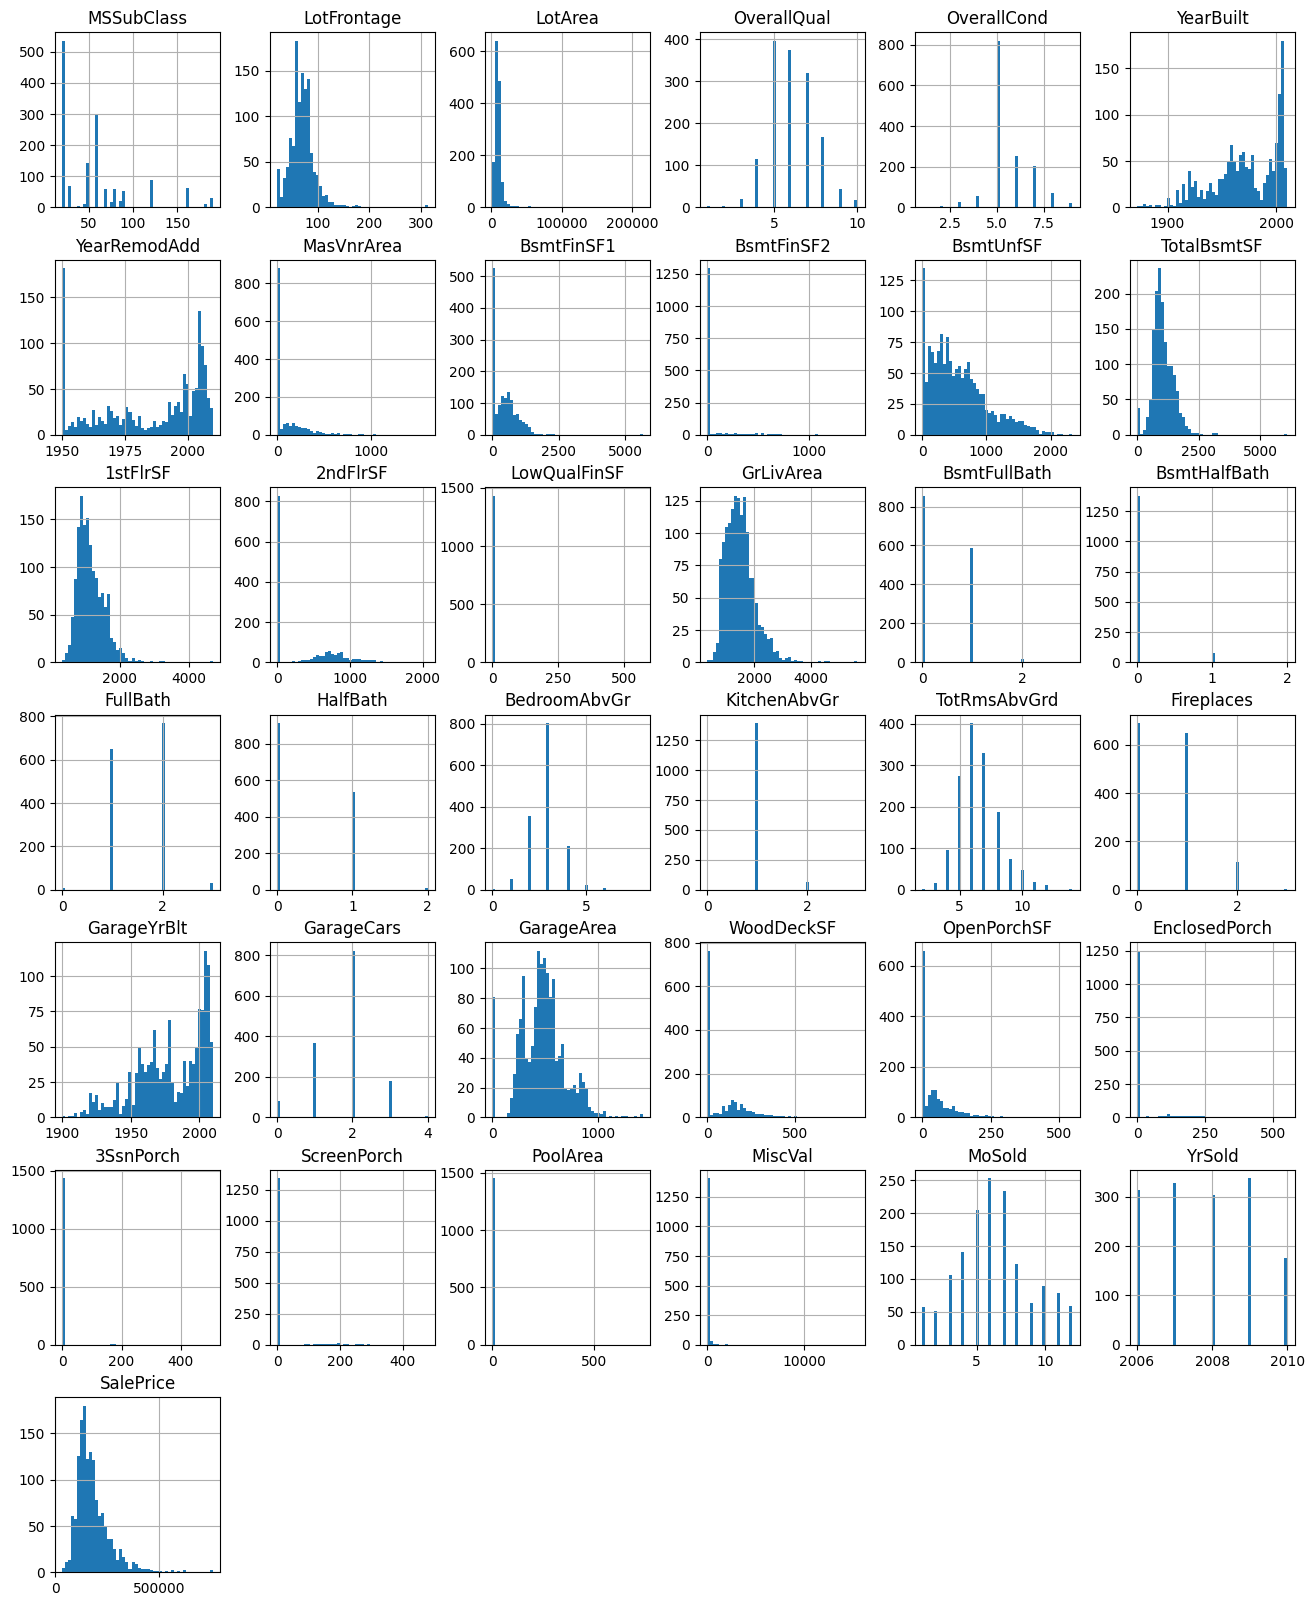

In [17]:
hist_all=num_df.hist(figsize=(16,20),bins=50)

In [18]:
corr=num_df.corr()

<Axes: >

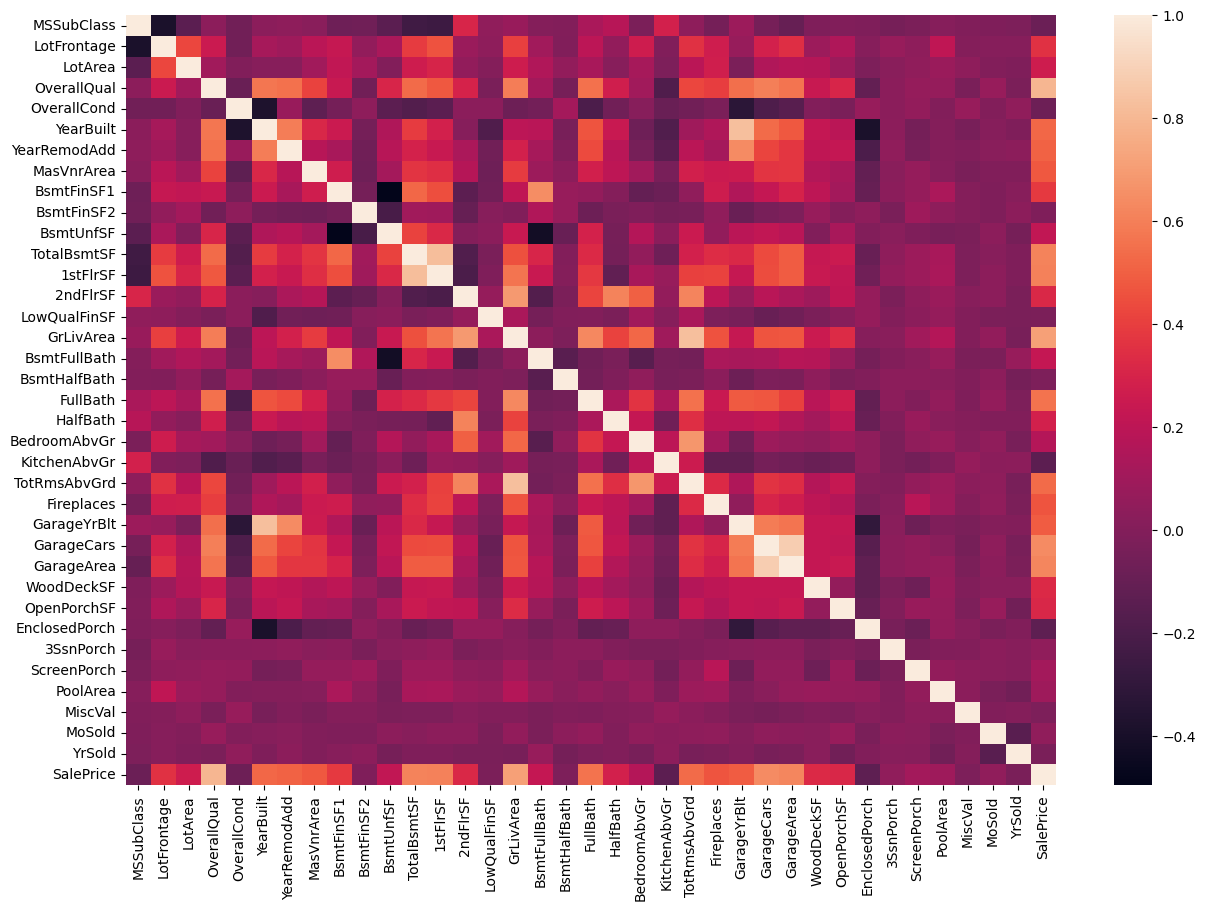

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(corr)

In [20]:
# from above we can see that GrLivArea and SalePrice got a relation , there is  a clear upward trand , as GrLivArea incresees the SalePrice also incresees ,
# but it is not perfectly linear , maening other factors also can influnce the SalePrice and there are mnay outliers too. 

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

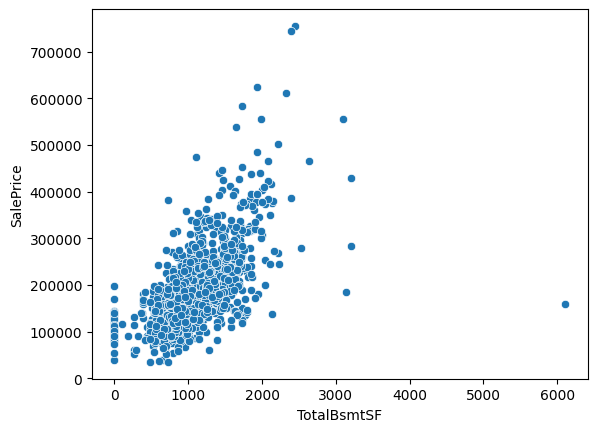

In [21]:
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=new_df)

In [22]:
# relationship with categorical  feature 

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

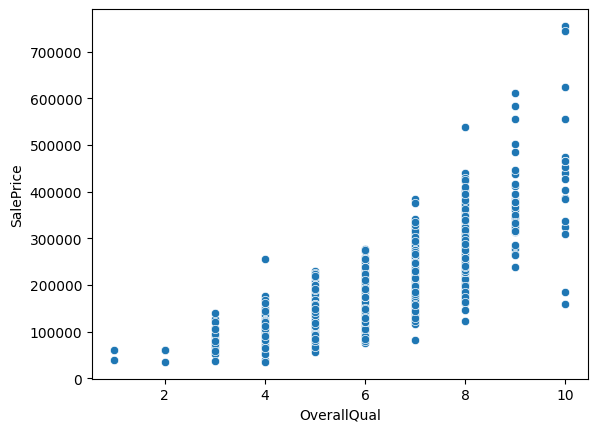

In [23]:
#scatterplot
sns.scatterplot(x="OverallQual",y="SalePrice", data=new_df)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

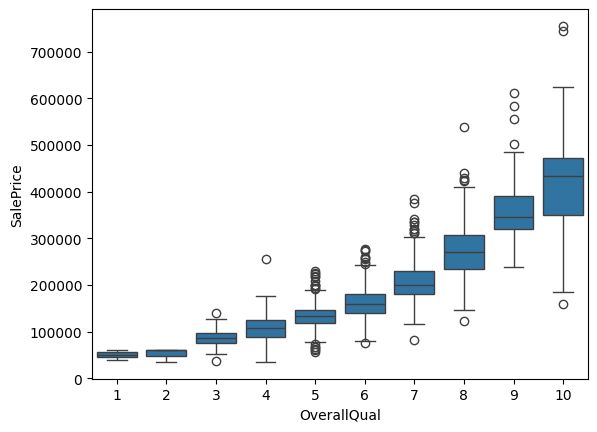

In [24]:
# boxplot
sns.boxplot(x="OverallQual",y="SalePrice", data=new_df,showfliers=True)

In [25]:
# as we can see there are vary good relationship between OverallQuala and SalePrice , as assumed high Overallquala represent high SalePrice .

<Axes: >

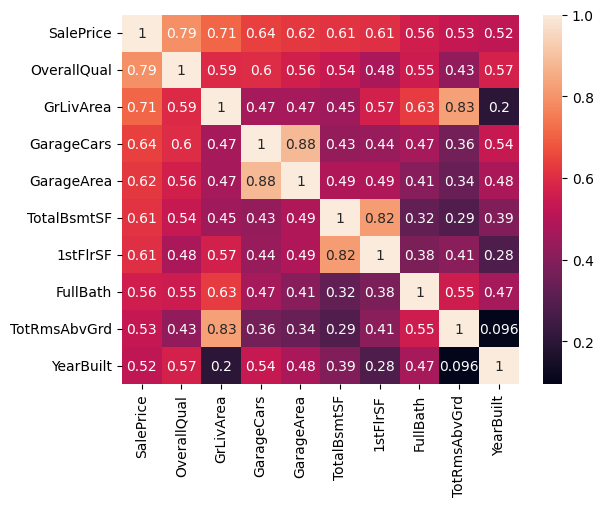

In [26]:
cm=corr["SalePrice"].nlargest(10).index
gn=np.corrcoef(new_df[cm].values.T)
sns.heatmap(gn,cbar=True,annot=True,yticklabels=cm.values,xticklabels=cm.values)

c:\Users\anime\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


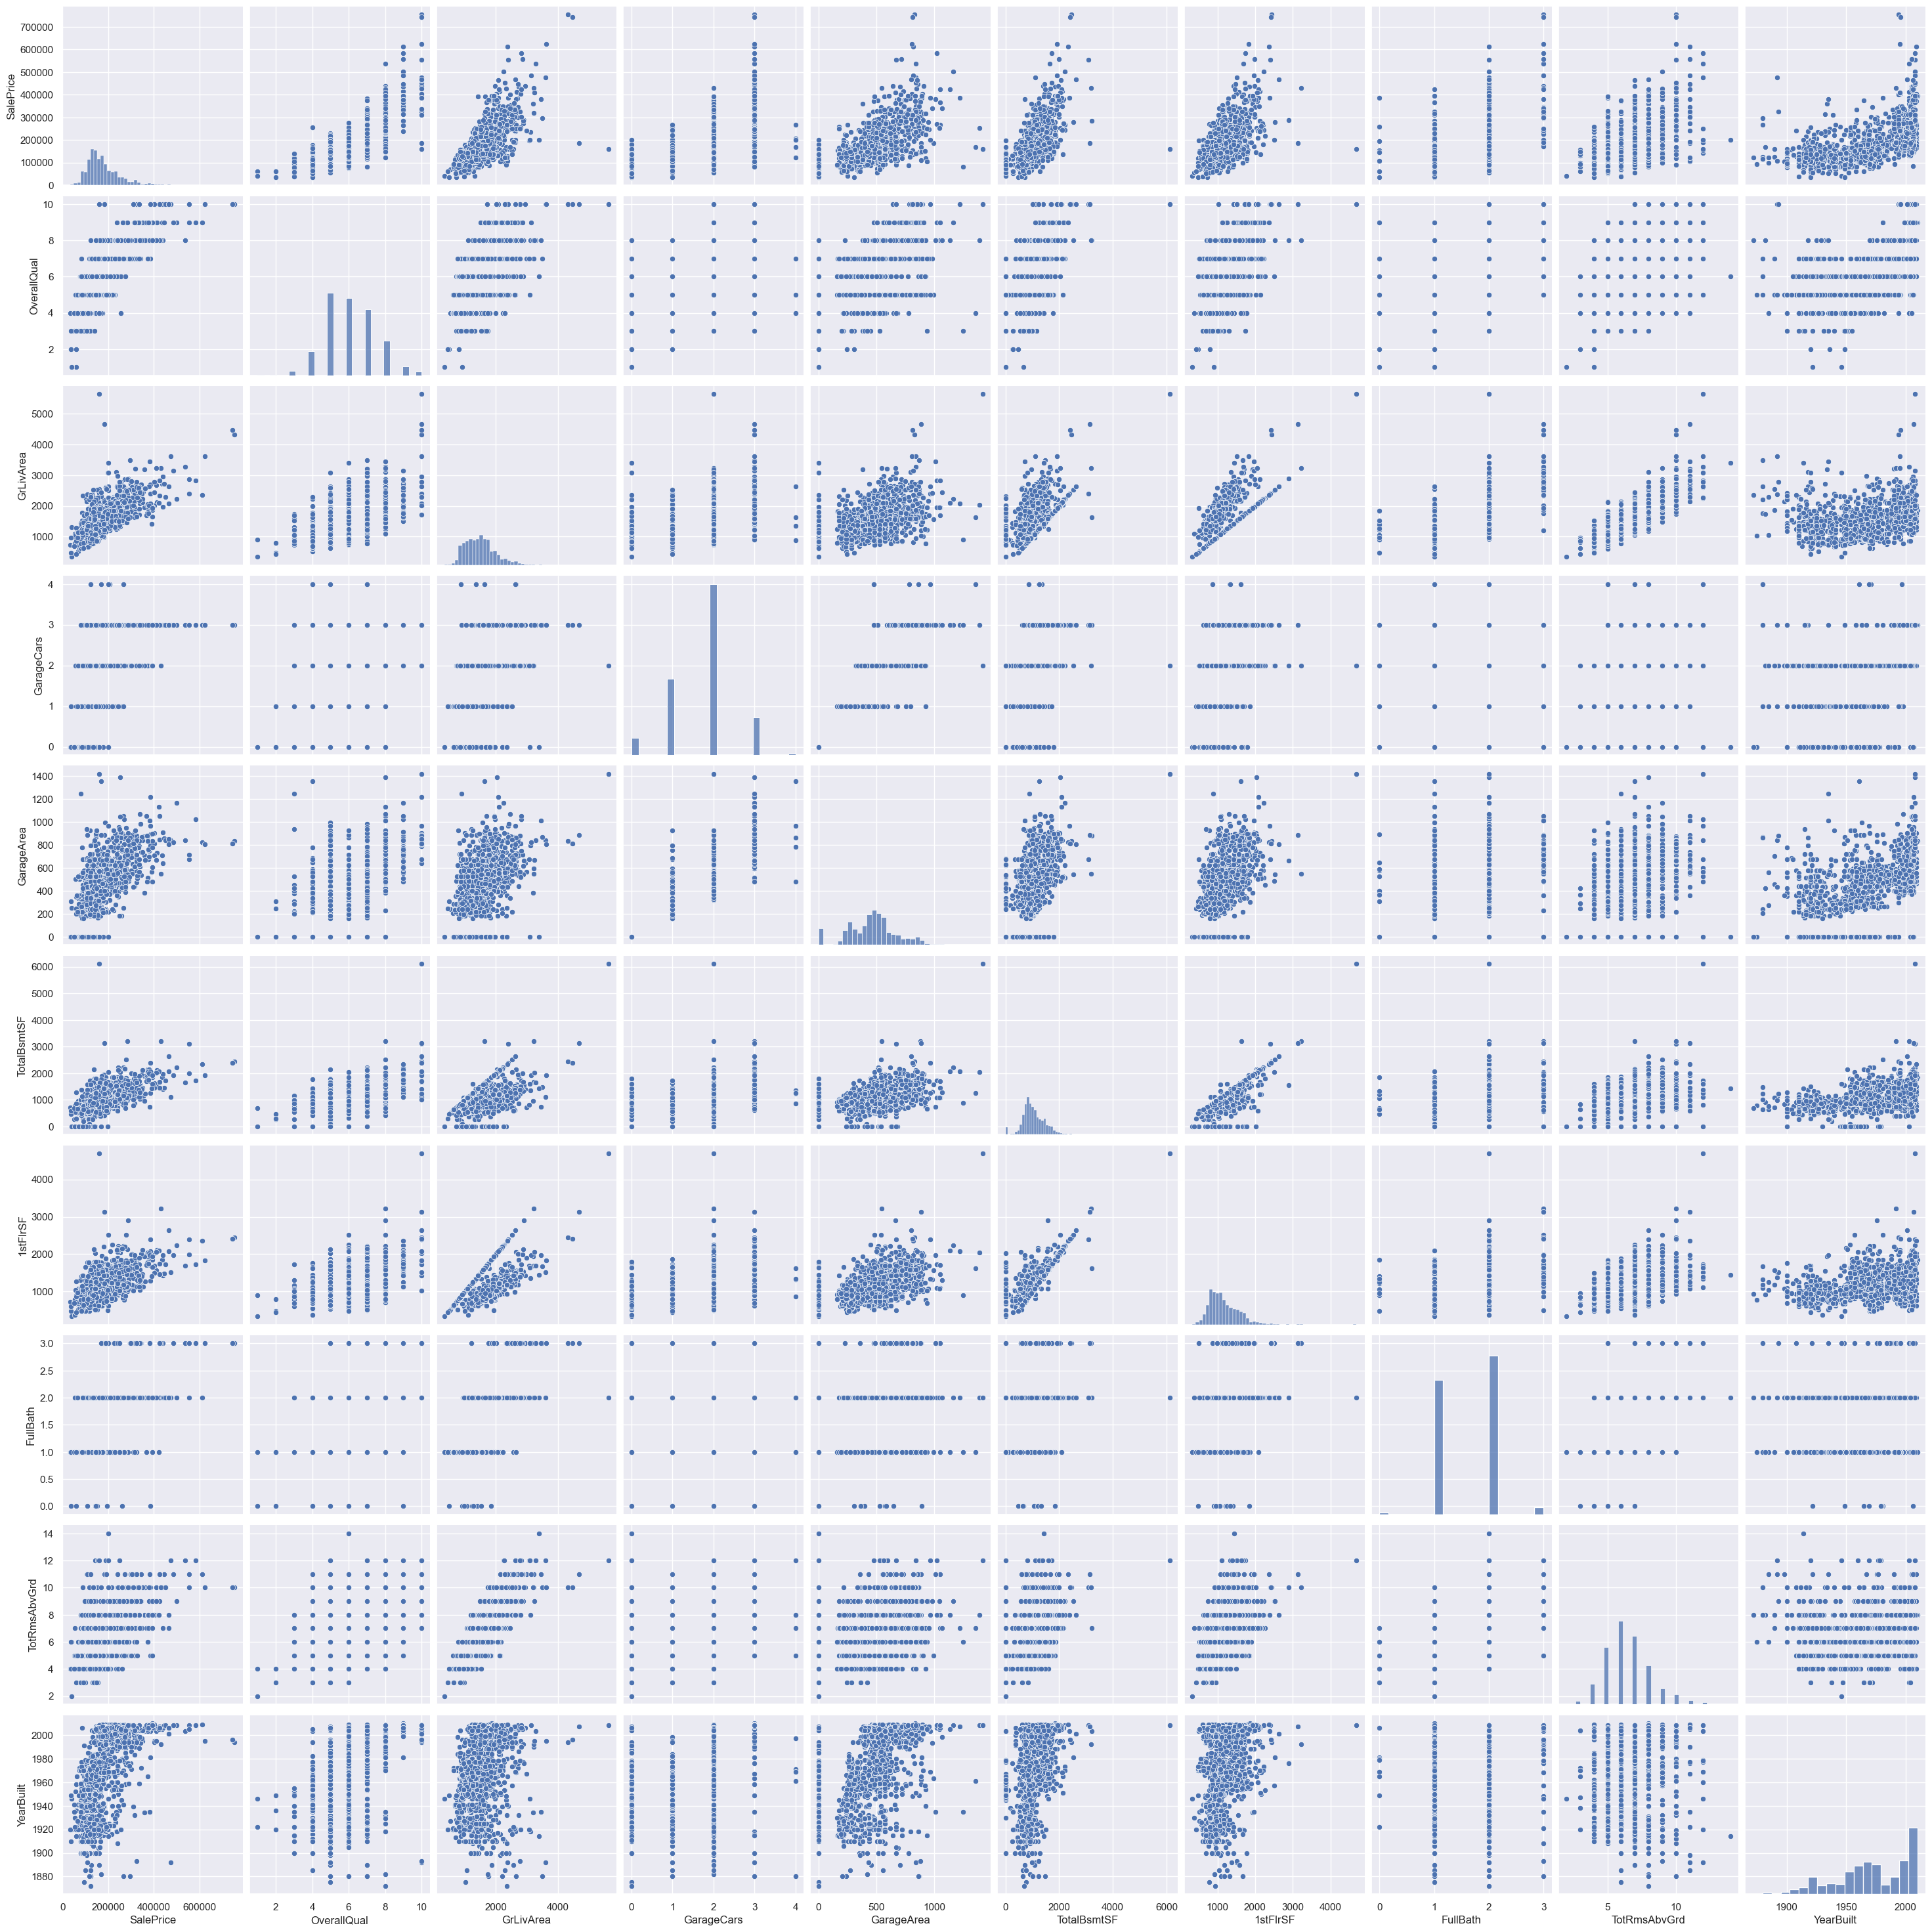

In [27]:
sns.set()
sns.pairplot(new_df[cm],size=3)

In [28]:
#looking for missing values and there percentage

pd.set_option("display.max_rows",None)
total=new_df.isnull().sum().sort_values(ascending=False)
percent=(new_df.isnull().sum()/new_df.isnull().count()).sort_values(ascending=False)


In [29]:
missing_data=pd.concat([total,percent],axis=1,keys=["total","percent"])
missing_data

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [30]:
#even tho some values are missing , we can ignore these columns, these are not needed or they will not affect the SalesPrice collumn.
#delecting missing data


In [31]:
list(missing_data[missing_data["total"]>1].index)

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'MasVnrType',
 'FireplaceQu',
 'LotFrontage',
 'GarageYrBlt',
 'GarageCond',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtCond',
 'BsmtQual',
 'BsmtFinType1',
 'MasVnrArea']

In [32]:
df_train=new_df.drop(columns=(list(missing_data[missing_data["total"]>1].index))) #(reload this for new df_train set creation )

In [33]:
df_train.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [34]:
#outliers
#stanadardizing SalesPrice

In [35]:
saleprice_scaled=StandardScaler().fit_transform(df_train["SalePrice"].values.reshape(-1,1))

In [36]:
low_value=saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]

In [37]:
high_values=saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

In [38]:
high_values

array([[3.82897043],
       [4.04098249],
       [4.49634819],
       [4.71041276],
       [4.73032076],
       [5.06214602],
       [5.42383959],
       [5.59185509],
       [7.10289909],
       [7.22881942]])

In [39]:
#bivariate analysis


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

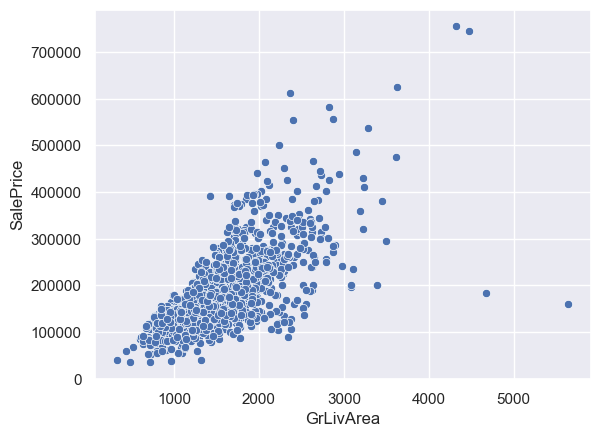

In [40]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df_train)

In [41]:
# the two values with higher grlivarea are outliers , 
# they ddont follow the trand , which is inc in grlivearea is proportional to saleprices

In [42]:
#deleting these two point from data
df_train.sort_values(by="GrLivArea",ascending=False)[2:]
df_train=df_train.sort_values(by="GrLivArea",ascending=False)[2:] #new_df_0 contains data without the above mentioned points (outliers)

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

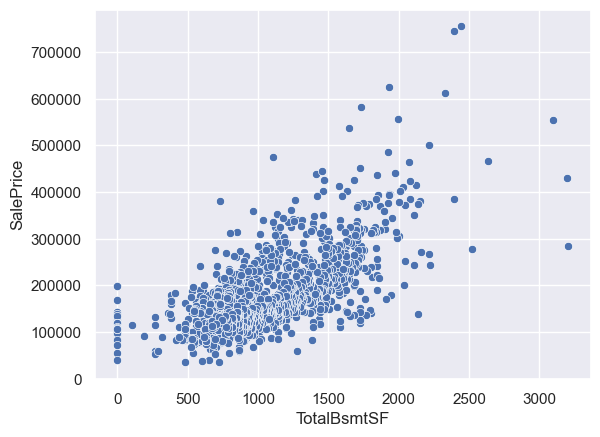

In [43]:
# bivarirate anlysis of Saleprice/TotalBsmtSF
sns.scatterplot(x="TotalBsmtSF",y="SalePrice",data=df_train)

In [44]:
#point with <3000(TotalBsmtSF) those three looks like outlier , but lets keep them as they seems to be fall in same tran

<Axes: xlabel='SalePrice', ylabel='Count'>

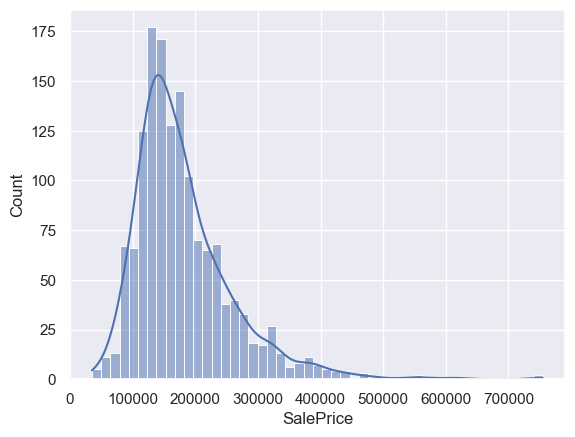

In [45]:
sns.histplot(df_train["SalePrice"],kde=True)


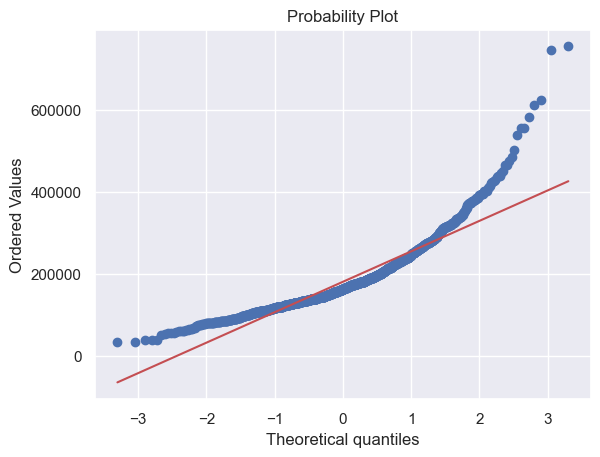

In [46]:
res=stats.probplot(df_train["SalePrice"],plot=plt)

In [47]:
# as we can see it got possitive skewness , as in the upper quantiles ( far right side of the graph),
# most points are falling above the theroretical normal distribution(q-q plot)
# we can solve this problem with log transformation , as mostof the right skewness is solved with log transformation..

In [48]:
#applying log transformation
df_train["SalePrice"]=np.log(df_train["SalePrice"])

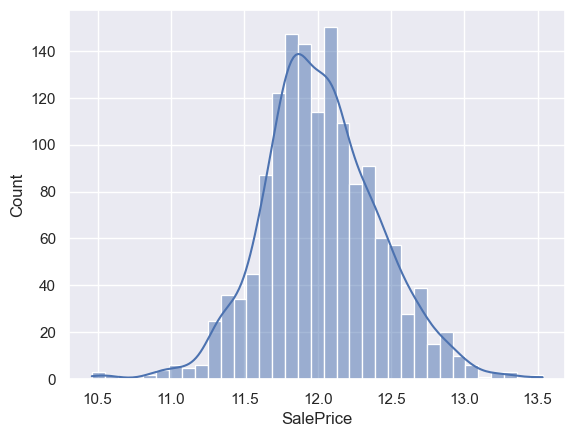

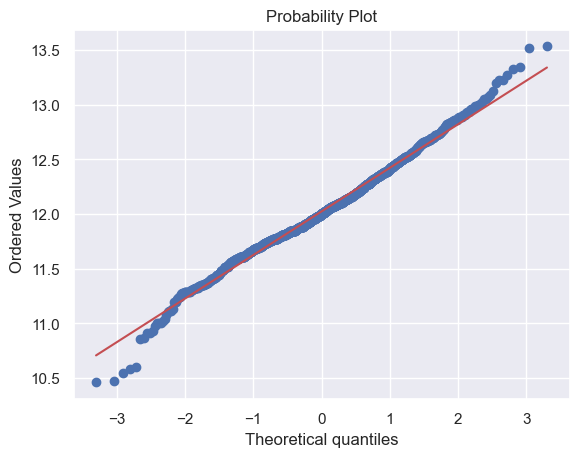

In [49]:
# transormed histogram and q-q plot
sns.histplot(df_train["SalePrice"],kde=True)
fig=plt.figure()
res=stats.probplot(df_train["SalePrice"],plot=plt)

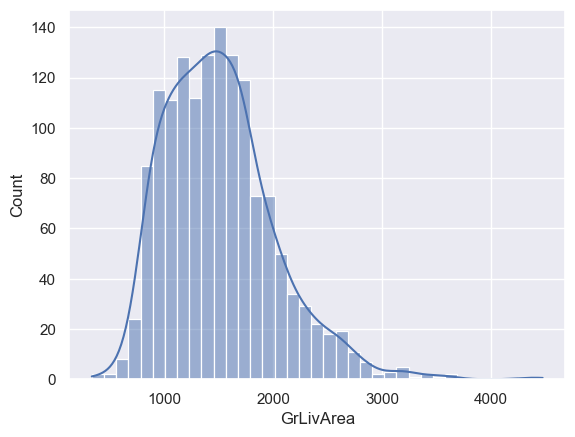

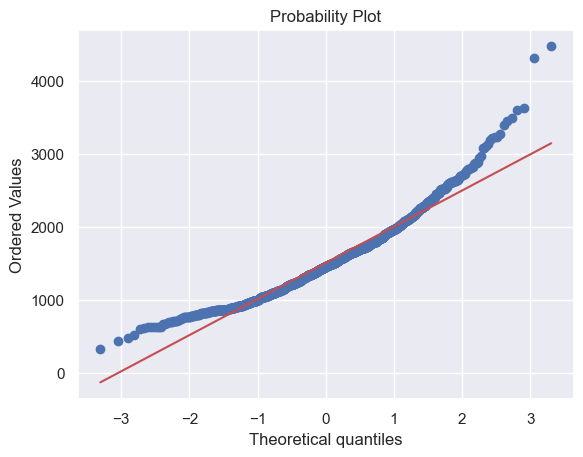

In [50]:
# lets do the q-q plot and histogram for GrLivArea
sns.histplot(df_train["GrLivArea"],kde=True)
fig=plt.figure()
res=stats.probplot(df_train["GrLivArea"],plot=plt)

In [51]:
# as we can see same right skewness with GrLivArea values so make a log tranformation on it .
df_train["GrLivArea"]=np.log(df_train["GrLivArea"])

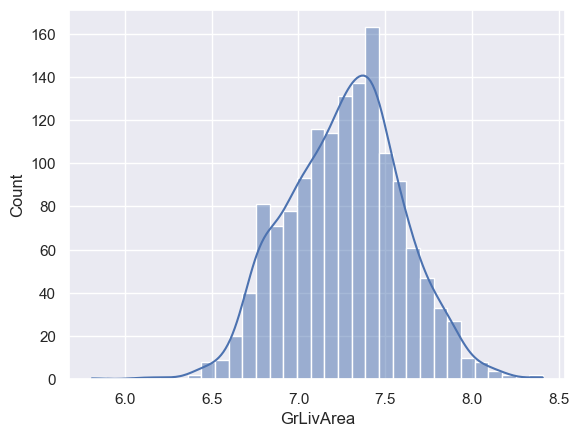

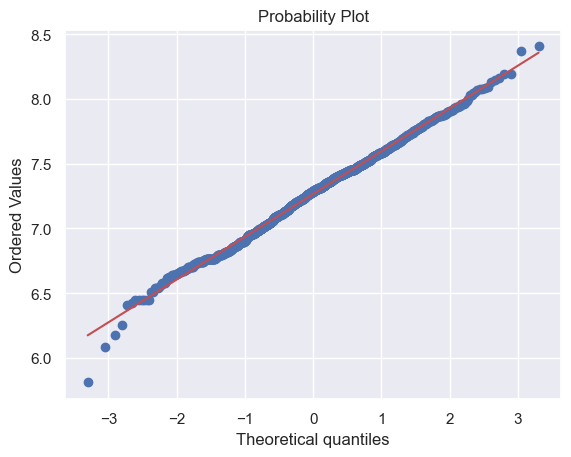

In [52]:
#creating the histogram and q-q plot after log transformation onGrLivArea
sns.histplot(df_train["GrLivArea"],kde=True)
fig=plt.figure()
res=stats.probplot(df_train["GrLivArea"],plot=plt)

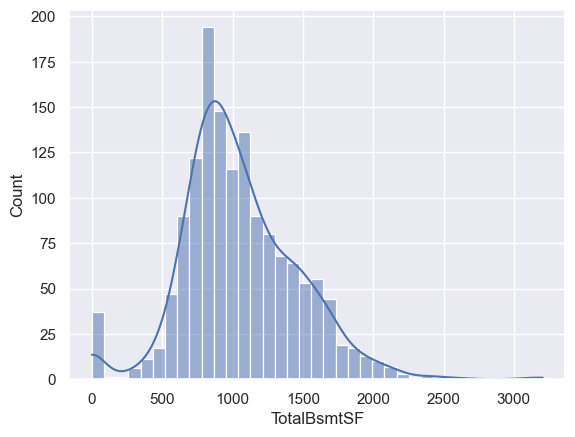

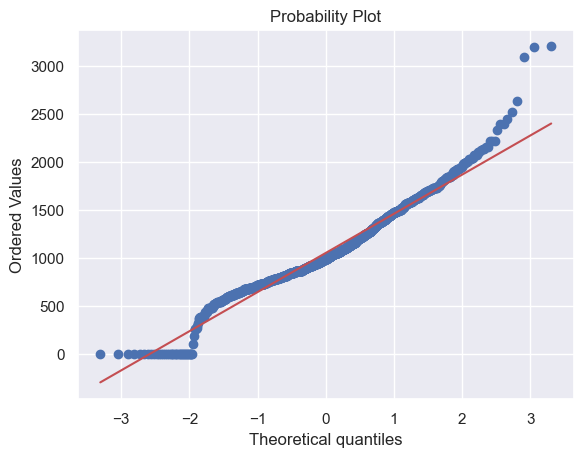

In [53]:
## lets do the q-q plot and histogram for TotalBsmtSF
sns.histplot(df_train["TotalBsmtSF"],kde=True)
fig=plt.figure()
res=stats.probplot(df_train["TotalBsmtSF"],plot=plt)

In [54]:
# there are lot of values with zero , so we cant apply log transformation directly 
# to apply log transformation here 
df_train["hasbsmt"]=(df_train["TotalBsmtSF"]>0).astype(int)

In [55]:
df_train["TotalBsmtSF_log"]=df_train["TotalBsmtSF"]

In [56]:
df_train.loc[df_train['hasbsmt']==1,"TotalBsmtSF_log"]=np.log1p(df_train.loc[df_train['hasbsmt']==1,"TotalBsmtSF_log"])
#df_train = df_train.drop('TotalBsmtSF', axis=1)


C:\Users\anime\AppData\Local\Temp\ipykernel_2448\3024196341.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[7.78197323 7.8018004  7.56579328 ... 6.25575004 6.17586727 5.67332327]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train['hasbsmt']==1,"TotalBsmtSF_log"]=np.log1p(df_train.loc[df_train['hasbsmt']==1,"TotalBsmtSF_log"])


In [57]:
df_train["TotalBsmtSF_log"]


1182    7.781973
691     7.801800
1169    7.565793
185     7.010312
304     7.293698
1268    6.591674
635     7.273093
769     7.409136
1353    7.617760
496     8.071219
118     7.422971
608     6.873164
798     7.563720
197     7.215975
1173    7.377134
1031    6.715383
324     6.566672
58      7.252054
1024    7.356280
1175    7.428927
961     7.193686
1046    7.597396
1142    7.290975
803     7.458763
1312    7.282074
231     7.288244
1328    7.320527
1386    7.239215
583     7.121252
322     7.315218
349     7.522400
190     6.749931
745     7.041412
527     7.281386
642     7.577122
112     7.142827
161     7.360740
859     6.961296
318     7.206377
477     7.675082
747     7.123673
1350    7.130099
1373    7.876259
423     7.293698
417     7.223296
1105    7.288928
1230    7.216709
621     7.328437
981     7.111512
875     7.077498
1360    6.418365
1313    7.239933
320     7.130899
702     7.118826
261     7.301822
1440    6.378426
716     6.577861
759     7.184629
1387    6.5722

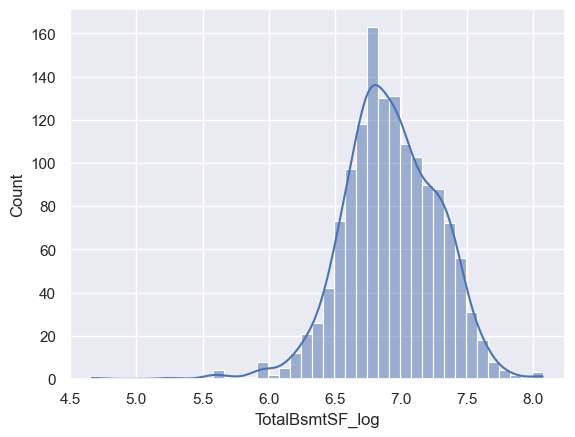

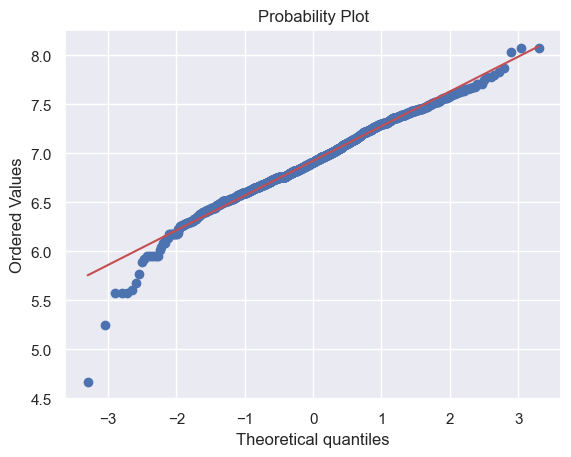

In [58]:

#creating graph after log tranformation
sns.histplot(df_train[df_train['TotalBsmtSF_log']>0]['TotalBsmtSF_log'],kde=True)
fig=plt.figure()
res=stats.probplot(df_train[df_train['TotalBsmtSF_log']>0]['TotalBsmtSF_log'],plot=plt)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

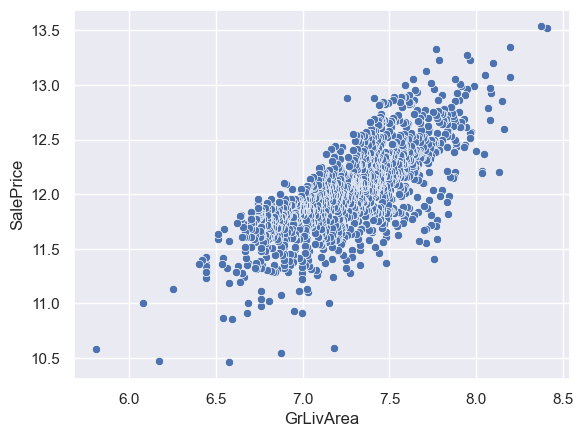

In [59]:
#scatter plot again after applyingthe log transformation 
sns.scatterplot(x="GrLivArea",y="SalePrice",data=df_train)

<Axes: xlabel='TotalBsmtSF_log', ylabel='SalePrice'>

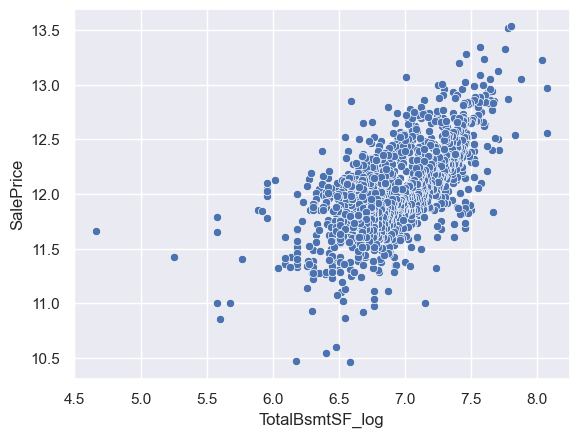

In [60]:
#befor the  transformation it has a conic shape but , it dont have any more
#lets check for Saleprice/TotalBsmtSF
sns.scatterplot(x=df_train[df_train['TotalBsmtSF_log']>0]['TotalBsmtSF_log'],y=df_train[df_train['TotalBsmtSF_log']>0]["SalePrice"],data=df_train)

In [62]:
#ending of comprensive data exploration